# **Prerequisites**
Before we start the coding part, make sure that you have set up your Python 3 environment and required packages. If you don’t have an environment set up yet, you can follow the steps in this [tutorial](https://www.relataly.com/anaconda-python-environment-machine-learning/1663/) to set up the Anaconda environment or you can use Google Colab Tools.

# **Step #1 Import and install required Libraries/Packages**

In [ ]:
!pip install sastrawi
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.0 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16517 sha256=509111665a9ab9a872d0756a769d82008eb18d99138e6a9c284c6d812c089b58
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


In [ ]:
# Libraries for Data Manipulation
import pandas as pd
import re
import string
import numpy as np
from tqdm import tqdm
import time
import random
import json
import reprlib
from datetime import datetime
from pprint import pprint
from operator import itemgetter
import requests
import csv

# Libraries for NLP Preprocessing Text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Modeling and Evaluation
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
import keras
from keras import regularizers, backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Reshape, Flatten, concatenate, Input
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, GlobalMaxPool1D
from keras.layers import Embedding, BatchNormalization, LSTM, Bidirectional
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
#from keras_preprocessing.sequence import pad_sequences
from keras import utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# Libraries for visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('bmh')
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset awal.xlsx to dataset awal.xlsx


# **Step #3 Load Dataset**

In [ ]:
# Load Dataset
data = pd.read_excel('dataset awal.xlsx', usecols=['date','username','tweet'])
data

,date,username,tweet
0,2021-12-31,isbibandung,Rektor beserta Civitas Akademika Institut Seni...
1,2021-12-31,ditjendikti,"Halo #InsanDikti,\n\nSegenap pimpinan dan kelu..."
2,2021-12-31,Mitanewscoid,Syaiful Syafri ; Relawan KSJ Unsur Pelajar Da...
3,2021-12-31,KabarSiang,Dukungan Stakeholders Perguruan Tinggi Terhada...
4,2021-12-31,Kemdikbud_RI,"#SahabatDikbud, Wayan, Martha, Nisa, dan Chand..."
...,...,...,...
13733,2021-01-04,mbkm_official,ANDA PEMAIN INDUSTRI PERBUKUAN MALAYSIA? \n\...
13734,2021-01-03,DosenGarisLucu,"Semester baru akan dimulai, sementara Mendikbu..."
13735,2021-01-03,UPIfess,"!upi yg ikutan mbkm bahasa jepang, nanti nilai..."
13736,2021-01-01,mbkm_official,Selamat Tahun Baharu 2021 diucapkan kepada sem...


In [ ]:
# Display information of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13738 entries, 0 to 13737
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      13738 non-null  datetime64[ns]
 1   username  13738 non-null  object        
 2   tweet     13738 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 322.1+ KB


In [ ]:
# Check missing values
data.isnull().sum()

date        0
username    0
tweet       0
dtype: int64

# **Step #3 Preprocessing Dataset**

# a) Proses Cleansing Data

Pada tahapan proses cleansing data terdiri dari:
1. Lowercase (Mengubah huruf besar menjadi huruf kecil)
2. Menghapus karakter non-ascii
3. Menghapus @username pada teks
4. Menghapus penyebutan retweet "RT" pada teks
5. Menghapus baris baru
6. Menghapus hashtags pada teks
7. Menghapus karakter huruf tunggal pada teks seperti : a, b, c, dll
8. Menghapus karakter angka pada teks
9. Menghapus jarak/spasi yang berlebihan
10. Menghapus url pada teks
11. Menghapus tanda baca pada teks

In [ ]:
# Process Cleansing Data
def remove_special_character(tweet_data):
    # Convert text to lowercase
    tweet_data = tweet_data.lower()
    # Remove non-ascii characters from the string
    tweet_data = re.sub(r'[^\x00-\x7f]',r'', tweet_data)
    # Replace 2+ dots with space
    tweet_data = re.sub(r'\.{2,}', ' ', tweet_data)
    # Remove @username
    tweet_data = re.sub(r"(?:\@|https?\://)\S+", "", tweet_data)
    # Remove old style retweet text "RT"
    tweet_data = re.sub(r'RT', '', tweet_data)
    # Remove newline
    tweet_data = tweet_data.replace('\n','')
    # Remove hashtags
    tweet_data = re.sub(r'#\S+', ' ', tweet_data)
    # Remove single character
    pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
    tweet_data = re.sub("\s+", " ", re.sub(pattern, '', tweet_data))
    # Remove number
    tweet_data = re.sub(r"[^a-zA-Z^']", " ", tweet_data)
    # Remove url
    tweet_data = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tweet_data)
    tweet_data = re.sub(r"http\S+", "", tweet_data)
    # Strip space, " and ' from tweet
    tweet_data = tweet_data.strip(' "\'')
    # Replace multiple spaces with a single space
    tweet_data = re.sub(r'\s+', ' ', tweet_data)
    # Remove punctuation
    tweet_data = tweet_data.translate(str.maketrans("","",string.punctuation))
    return tweet_data

data['tweet'] = data['tweet'].apply(remove_special_character)

print('Remove Special Character Result : \n')
print(data['tweet'].head(50))

Remove Special Character Result : 

0     rektor beserta civitas akademika institut seni...
1     halo pimpinan dan keluarga besar ditjen diktir...
2     syaiful syafri relawan ksj unsur pelajar dan m...
3     dukungan stakeholders perguruan tinggi terhada...
4     wayan martha nisa dan chandra mengisi malam ta...
5     bentar ini sender sekolah apa kerja rodi dikat...
6     refleksi akhir tahun labschool unesa fokuskan ...
7     anak sekolah dki jakarta sudah harus ptm denga...
8     kunjungan pmm dn ke stp acara kunjungan di sci...
9     saksikan webinar dengan tema kesiapan pelaksan...
10    hai kantor pertanahan kabupaten pacitan menjad...
11    muhammadiyah ingatkan merdeka belajar bukan se...
12    menjadi guru asn yg amanah membuat perubahan y...
13    program merdeka belajar kampus merdeka perlu d...
14    semoga kita senantiasa mendapat kemurahan alla...
15    ukrida meneliti kata kunci merdeka belajar dan...
16    saya menyukai podcast ini saat membahas mengen...
17     untuk

# b) Proses Remove Symbol (Menghapus Emoticon, Emoji, Karakter Symbol)

In [ ]:
# Remove symbol
def remove_symbol(tweet):
    tweet = ''.join(
        re.sub(r"[\!\@\#\$\%\^\&\*\(\)\?\,\"\|\:]+", "", tweet)
    )
    return tweet

data['tweet'] = data['tweet'].apply(remove_symbol)
print('Remove Symbol Result : \n')
print(data['tweet'].head(50))

Remove Symbol Result : 

0     rektor beserta civitas akademika institut seni...
1     halo pimpinan dan keluarga besar ditjen diktir...
2     syaiful syafri relawan ksj unsur pelajar dan m...
3     dukungan stakeholders perguruan tinggi terhada...
4     wayan martha nisa dan chandra mengisi malam ta...
5     bentar ini sender sekolah apa kerja rodi dikat...
6     refleksi akhir tahun labschool unesa fokuskan ...
7     anak sekolah dki jakarta sudah harus ptm denga...
8     kunjungan pmm dn ke stp acara kunjungan di sci...
9     saksikan webinar dengan tema kesiapan pelaksan...
10    hai kantor pertanahan kabupaten pacitan menjad...
11    muhammadiyah ingatkan merdeka belajar bukan se...
12    menjadi guru asn yg amanah membuat perubahan y...
13    program merdeka belajar kampus merdeka perlu d...
14    semoga kita senantiasa mendapat kemurahan alla...
15    ukrida meneliti kata kunci merdeka belajar dan...
16    saya menyukai podcast ini saat membahas mengen...
17     untuk dan yaitu 

# c) Proses Tokenizing (Proses memecah kalimat menjadi potongan kata)

In [ ]:
# Process Tokenizing
def tokenize_data(tweet):
    return word_tokenize(tweet)

data['tweet'] = data['tweet'].apply(tokenize_data)
print('Tokenizing Result : \n')
print(data['tweet'].head(50))

Tokenizing Result : 

0     [rektor, beserta, civitas, akademika, institut...
1     [halo, pimpinan, dan, keluarga, besar, ditjen,...
2     [syaiful, syafri, relawan, ksj, unsur, pelajar...
3     [dukungan, stakeholders, perguruan, tinggi, te...
4     [wayan, martha, nisa, dan, chandra, mengisi, m...
5     [bentar, ini, sender, sekolah, apa, kerja, rod...
6     [refleksi, akhir, tahun, labschool, unesa, fok...
7     [anak, sekolah, dki, jakarta, sudah, harus, pt...
8     [kunjungan, pmm, dn, ke, stp, acara, kunjungan...
9     [saksikan, webinar, dengan, tema, kesiapan, pe...
10    [hai, kantor, pertanahan, kabupaten, pacitan, ...
11    [muhammadiyah, ingatkan, merdeka, belajar, buk...
12    [menjadi, guru, asn, yg, amanah, membuat, peru...
13    [program, merdeka, belajar, kampus, merdeka, p...
14    [semoga, kita, senantiasa, mendapat, kemurahan...
15    [ukrida, meneliti, kata, kunci, merdeka, belaj...
16    [saya, menyukai, podcast, ini, saat, membahas,...
17    [untuk, dan, yaitu, 

# d) Proses Normalisasi Teks

Proses normalisasi teks terdiri dari :
1. Normalisasi kata yang memiliki kata berupa singkatan
2. Normalisasi kata yang memiliki kesalahan pada penulisan kata, atau membuat kata menjadi sesuai kaidah standar kamus KBBI

upload file kamus singkatan dan file stopword

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kamus_singkatan.csv to kamus_singkatan.csv
Saving stopwordsID.csv to stopwordsID.csv


In [ ]:
# Filtering | Singkatan Indo
normalizad_word = pd.read_csv("kamus_singkatan.csv")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]


data['tweet'] = data['tweet'].apply(normalized_term)

print('Text Normalization Result : \n')
print(data['tweet'].head(50))

Text Normalization Result : 

0     [rektor, beserta, civitas, akademika, institut...
1     [halo, pimpinan, dan, keluarga, besar, ditjen,...
2     [syaiful, syafri, relawan, ksj, unsur, pelajar...
3     [dukungan, stakeholders, perguruan, tinggi, te...
4     [wayan, martha, nisa, dan, chandra, mengisi, m...
5     [bentar, ini, sender, sekolah, apa, kerja, rod...
6     [refleksi, akhir, tahun, labschool, unesa, fok...
7     [anak, sekolah, dki, jakarta, sudah, harus, pt...
8     [kunjungan, pmm, dn, ke, stp, acara, kunjungan...
9     [saksikan, webinar, dengan, tema, kesiapan, pe...
10    [hai, kantor, pertanahan, kabupaten, pacitan, ...
11    [muhammadiyah, ingatkan, merdeka, belajar, buk...
12    [menjadi, guru, asn, yg, amanah, membuat, peru...
13    [program, merdeka, belajar, kampus, merdeka, p...
14    [semoga, kita, senantiasa, mendapat, kemurahan...
15    [ukrida, meneliti, kata, kunci, merdeka, belaj...
16    [saya, menyukai, podcast, ini, saat, membahas,...
17    [untuk, dan,

In [ ]:
slang_word = requests.get('https://raw.githubusercontent.com/suciamaliyahm/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [ ]:
dict_slang.items()

dict_items([('gajelas', 'tidak jelas'), ('university', 'universitas'), ('prmisi', 'permisi'), ('gaaaak', 'tidak'), ('magangiismatukeran', 'magang isma tukeran'), ('pls', 'mohon'), ('sung', 'sung'), ('tuladha', 'tuladha'), ('bengong', 'termenung'), ('tweetnya', 'tweet'), ('bener-bener', 'benar'), ('meghanreborn', 'meghan reborn'), ('yanggak', 'yang tidak'), ('dimanfaatin', 'manfaat'), ('ngelunjak', 'lunjak'), ('nyaapakah', 'nyapa'), ('dijalanin', 'jalan'), ('bukabelum', 'buka belum'), ('merdekakok', 'merdeka kok'), ('diimbangi', 'imbang'), ('side', 'arah'), ('job', 'kerja'), ('alangkah', 'langkah'), ('tarilistyan', 'tari listyan'), ('menghasikkan', 'asik'), ('berintegritas', 'integritas'), ('halangan', 'halang'), ('terbsik', 'terbesik'), ('nengokin', 'jenguk'), ('sdg', 'sedang'), ('deadline', 'deadline'), ('gatel', 'gatal'), ('pend', 'pendidikan'), ('inifiniii', 'ini fini'), ('bu', 'ibu'), ('guwuuuu', 'guwu'), ('buangga', 'bangga'), ('pemulihan', 'pulih'), ('hebattt', 'hebat'), ('terusk

In [ ]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,gajelas,tidak jelas
1,university,universitas
2,prmisi,permisi
3,gaaaak,tidak
4,magangiismatukeran,magang isma tukeran


In [ ]:
# Remove trailing white space
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

# Transform into key value in a dict
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

def removeSlang(data):
  # Iterate through data
  for i, word in enumerate(data):
    # Check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # If data is not slang then pass
    except KeyError:
      pass
  return data

data['tweet'] = data['tweet'].apply(removeSlang)

print('Convert Slang Words Result : \n')
print(data['tweet'].head(50))

Convert Slang Words Result : 

0     [rektor, beserta, civitas, akademika, institut...
1     [halo, pimpinan, dan, keluarga, besar, ditjen,...
2     [syaiful, syafri, relawan, ksj, unsur, pelajar...
3     [dukungan, stakeholders, perguruan, tinggi, te...
4     [wayan, martha, nisa, dan, chandra, mengisi, m...
5     [sebentar, ini, sender, sekolah, apa, kerja, r...
6     [refleksi, akhir, tahun, labschool, unesa, fok...
7     [anak, sekolah, dki, jakarta, sudah, harus, pt...
8     [kunjungan, pmm, dn, ke, stp, acara, kunjungan...
9     [saksikan, webinar, dengan, tema, kesiapan, pe...
10    [hai, kantor, pertanahan, kabupaten, pacitan, ...
11    [muhammadiyah, ingatkan, merdeka, belajar, buk...
12    [menjadi, guru, asn, yang, amanah, membuat, pe...
13    [program, merdeka, belajar, kampus, merdeka, p...
14    [semoga, kita, senantiasa, mendapat, kemurahan...
15    [ukrida, meneliti, kata, kunci, merdeka, belaj...
16    [saya, menyukai, podcast, ini, saat, membahas,...
17    [untuk, dan

# e) Proses Negation Handling (Proses penangan negasi pada suatu kata)

Dalam beberapa studi literatur tentang klasifikasi teks yang telah dilakukan. Terdapat masalah dalam klausa atau pendekatan tingkat klausa, termasuk penggunaan negasi dalam subtugas analisis data teks. Misalnya frase “Saya suka dengan sistem pembelajaran daring” dengan “Saya tidak suka dengan sistem pembelajaran daring”. Kedua himpunan ini dapat diwakili oleh vektor fitur yang sama, kemudian menyebabkan kesalahan klasifikasi. Dimana makna pada kalimat pertama menyatakan kesukaan dan makna pada kalimat kedua menyatakan ketidaksukaan.

Dalam bidang NLP pada tahapan preprocessing text terdapat tahapan stopword (penghapusan kata yang bermakna kurang penting), dan salah satu kata yang masuk kedalam daftar stopword adalah kata "tidak". Sehingga apabila kata tidak dihapus maka kalimat sebelumnya "Saya tidak suka dengan sistem pembelajaran daring" akan menjadi “Saya suka dengan sistem pembelajaran daring”, kemudian menyebabkan kesalahan pada klasifikasi. Oleh karena itu perlu ditangani permasalahan tersebut.

Beberapa cara dalam karya sebelumnya untuk menangani negasi dalam bahasa Inggris pertama dengan menentukan ruang lingkup negasi. Das dan Chen mengusulkan dengan flag NOT_ atau jendela statis. Bukan hanya bahasa Inggris, tetapi penelitian tentang efek negasi dalam klasifikasi teks juga dilakukan untuk bahasa lain [1].

Sehingga keluaran dari hasil penanganan negasi menjadi "Saya tidak tidak_suka dengan sistem pembelajaran daring" hanya kata tidak yang akan dihapus ketika tahapan stopword, namun kata "tidak" yang telah digabungkan dengan kata berikutnya kata "suka" dengan diberikan pemisah sebuah tanda (_) akan tetap ada pada kalimat teks.

<br>

Reference :

Amalia, R., Bijaksana, M.A., & Darmantoro, D. (2018). Negation handling in
sentiment classification using rule-based adapted from Indonesian language
syntactic for Indonesian text in Twitter. Journal of Physics: Conference Series,
971.

In [ ]:
# Function for do negation handling
def handling_negation(content):
    negation_content = []
    for i in range(len(content)):
        word = content[i]
        if content[i-1] not in ['ga', 'tidak', 'kurang', 'gak', 'enggak', 'nggak', 'tak']:
            negation_content.append(word)
        else:
            word = "%s_%s" %(content[i-1],word)
            negation_content.append(word)
    return negation_content

data['tweet'] = data['tweet'].apply(handling_negation)

print('Negation Handling Result : \n')
print(data['tweet'].head(50))

Negation Handling Result : 

0     [rektor, beserta, civitas, akademika, institut...
1     [halo, pimpinan, dan, keluarga, besar, ditjen,...
2     [syaiful, syafri, relawan, ksj, unsur, pelajar...
3     [dukungan, stakeholders, perguruan, tinggi, te...
4     [wayan, martha, nisa, dan, chandra, mengisi, m...
5     [sebentar, ini, sender, sekolah, apa, kerja, r...
6     [refleksi, akhir, tahun, labschool, unesa, fok...
7     [anak, sekolah, dki, jakarta, sudah, harus, pt...
8     [kunjungan, pmm, dn, ke, stp, acara, kunjungan...
9     [saksikan, webinar, dengan, tema, kesiapan, pe...
10    [hai, kantor, pertanahan, kabupaten, pacitan, ...
11    [muhammadiyah, ingatkan, merdeka, belajar, buk...
12    [menjadi, guru, asn, yang, amanah, membuat, pe...
13    [program, merdeka, belajar, kampus, merdeka, p...
14    [semoga, kita, senantiasa, mendapat, kemurahan...
15    [ukrida, meneliti, kata, kunci, merdeka, belaj...
16    [saya, menyukai, podcast, ini, saat, membahas,...
17    [untuk, dan, 

# f) Proses Stopwords (Proses menghapus kata yang bermakna kurang penting)

In [ ]:
# Filtering | Stop Word
list_stopwords = (['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'seperti', 'jika', 'jika', 'sehingga', 'mungkin', 'kembali', 'dan',
                   'ini', 'karena', 'oleh', 'saat', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'sebagai', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bahwa',
                   'atau', 'dengan', 'akan', 'juga', 'kalau', 'ada', 'terhadap', 'secara', 'agar', 'lain', 'jadi', 'yang ', 'sudah', 'sudah begitu', 'mengapa',
                   'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah',
                   'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'aja', 'sementara', 'tetapi', 'apakah', 'sebab', 'selain', 'seolah', 'seraya',
                   'seterusnya', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu',
                   'demikian', 'tapi', 'juga', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'sebetulnya', 'setiap', 'sesuatu', 'pasti', 'saja', 'toh', 'ya',
                   'walau', 'apalagi', 'bagaimanapun', 'yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 'krn', 'nya',
                   'nih', 'sih', 'ah', 'ssh', 'om', 'ah', 'si', 'tau', 'tuh', 'utk', 'ya', 'cek', 'jd', 'aja', 't', 'nyg', 'hehe', 'pen', 'nan', 'loh',
                   'rt', '&amp', 'yah', 'ni', 'ret', 'za', 'nak', 'haa', 'zaa', 'maa', 'lg', 'eh', 'hmm', 'kali',
                   'nya', 'ku', 'cm', 'guys', 'oh', 'gitu', 'kaaa', 'dr', 'blm', 'bs', 'tp', 'skpi', 'nahhh', 'si', 'lg',
                   'oh', 'kd', 'jdi', 'abis', 'yuk', 'oncam', 'rp', 'ad', 'jg', 'tpi', 'hrs', 'utk', 'kl', 'sdh', 'egga', 'fyi',
                   'ta', 'jd', 'fess', 'dgn', 'dpt', 'yak', 'oiya', 'i', 'tuh', 'tuk', 'loh', 'bs', 'gbs', 'blg', 'trs', 'gt',
                   'gatau', 'hallo', 'kak', 'is', 'ad', 'tpi', 'hrs', 'cc', 'non', 'egga', 'u', 'i', 'm', 'a',
                   'ta', 'udah', 'guys', 'dlm', 'dpat', 'vang', 'nih', 'sd', 'nggk', 'pen', 'nyoba', 'heheh', 'nder', 'anu', 'hayu',
                   'dah', 'loh', 'widiw', 'gw', 'bgttt', 'gua', 'psst', 'skrg', 'sndri', 'sk', 'pas', 'sem', 'btw', 'mo', 'wwkwkwk',
                   'bgt', 'duh', 'wqwq', 'braw', 'smester', 'uhauha', 'org', 'tu', 'jgn', 'amiin', 'bcot', 'kmrn', 'sempet', 'sm', 'ucl', 'woyy',
                   'italyy', 's', 'wkwk', 'swt', 'kyk', 'gada', 'mhs', 'deh', 'tmn', 'heungg', 'd', 'gais', 'ohhhh', 'kek', 'yapun', 'pantes', 'engehhh',
                   'cari', 'bo', 'tau', 'ti', 'uajy', 'pmp', 'ki', 'wkwkwkwk', 'kle', 'kali', 'syl', 'huhu', 'plislah', 'mon', 'maappp', 'ny', 'gausah',
                   'bgtt', 'dll', 'sertif', 'bye', 'iya', 'loooo', 'hey', 'siapaaaaa', 'ngga', 'te', 'el', 'ah', 'sepet', 'dri', 'semest', 'go', 'jek',
                   'dn', 'lbh', 'sy', 'prbdi', 'sbg', 'u', 'amp', 'pi', 'en', 'es', 'yg', 'ya', 'ga', 'aja', 'gak', 'gue', 'eh', 'yang',
                   'rep','dedekdedek','ing','msaiddidu','eeh','nak','h','ads','ft','chccmnt','snf','wkwkkw','uu','gtk',
                   'nm','al','yhaa','huft','pup','ngaj','x','ka','ehe','sp','th','ups','buk','awkkwkw','sda','dik','ahem',
                   'meeeeeeeettt','sdsma','jprstyo','mn','t','mend','fafifu','wasweswos','nan','kyniejeller','ngeh','loo','rt',
                   'klu','pr','yo','e','rl','spd','tan','met','uny','kh','hih','z','of','iku','tik','brin','assjskbskldlahsjsls''xixi',
                   'yea','ber','ug','lo','hadehhhhhhhh','woio','ahh','lha','nu','nanani','esl','pt','iyo','cen','og',
                   'wis','uwin','ndi','rung','vavivyuh','wk','mkp','kipk','uhuyy','srv','sgd','oya','xi','mou','nj','l','j',
                   'sii','oke','tnp','dol','ko','aws','wkakaka','dkk','bp','wkkw','pra','oge','jom','deg','fkor','ndao','vmin',
                   'nggo','akpk','kui','pip','ra','unp','kn','c','uueuueueue','eaa','propo','kieu','haha','ina',
                   'pk','na','dak','baa','doh','juo','jo','pulo','lai','suai','soe','ness','opm','unsr','hid','r','kwkwkw',
                   'ekoti','samo','dk','cak','mano','aiishh','pp','koq','hhhh','beb','gc','haaaaa','hahahaha','hehehe',
                   'huhuhuhu','luh','waooo','huahaha','niiinennnn','ownge','p','jozz','uma','nahh','dm','lal','pa','hmmm','ilpol',
                   'ks','naki','upi','woiiiiii','bbynjmmm','or','hihihi','id','owalaaa','uk','tra','bless','cmiiw','anehaneh',
                   'beg','kw','pulp','cie','atuh','nusi','edu','erlass','de','hilmyr','nang','neo','uai','can','int',
                   'ben','hadehhh','bdr','copas','fg','yok','omg','otw','mbaa','qq','miiii','uag','nc','smsgid','yaaa','dudu',
                   'up','dew','dya','he','cooll','yoi','ec','egnrs','yuu','yup','uad','mi','mrsimanjuntak','dianashn','f','edx','mf','khan',
                   'rek','arep','svt', 'sh','llm','phd','pb','saeaa','st','mt','dhe','jt','icei','halah','kei','idikk','aaaaaa','to',
                   'doi','abc','wa','olh','sds','xixixiiii','yukkk','wkwkwkkwkw','wjsnjiyo','oyi','cah','nad','kaa','pluss',
                   'os','dimmm','ok','usu','rekkk','vc','bett','aelah','aelah','kuy','dom','weh','iye','bks',
                   'sg','maneh','onok','woy','lv','dih','heiii','ubb','siiiii','dh','hut','fb','diddycs','hah','ning','gek','fip',
                   'dehhh','km','jav','rion','um','kk','bdg','ws','loss','yoiku','roastednchn','as','v','yookiik','jogmfs',
                   'pcd','manjiww','bet','sam','ndek','fak','ma','ohh','uhuuuuyyy','mek','hadah','los','dem','od','yaekeke',
                   'lan','vi','ex','iesr','klhk','ndonta','ahey','hr','hj','nieeee','waaa','o','mgk',
                   'dis','ukbi','yaaaa','ye','hihi','plt','iaitb','strixhaven','esyeee','rg','lip','fer','sptjm','fafifuwasweswos',
                   'ngehe','hadeuh','ky','nct','ncik','naah','it','kah','&','wkwkwk','hahah','nyaaa''oalah','hahah','xxx','dongg','yuhp',
                   'inainu','hestek','onoke','reken','hasssh','wuopo','tcuih','dips', 'wkwkw','ataya','kafh', 'assalmu', 'warahmatullah', 'wabarakatuhmerdeka', 'maysqo',
                   'mohlah','nyaaa','k', 'hmmmm', 'yuks','yha', 'eits', 'wkwkk', 'awkkwkw', 'iyaaa', 'eeeh', 'ooooo',
                   'ehh', 'dannn', 'ugma','uwopoh', 'udehh', 'guis','wkwkwkw','wkwwk', 'dehh','nderr','haaiii',
                   'eiitss', 'genah', 'oalahhh', 'sesfao','eccd', 'novart', 'wkwkunej', 'nanani','ekeke','wehh','yra',
                   'wehh','neolib','wkwkunej','eccd','novart','tokling','tbh','assjskbskldlahsjsls','oalahhh','genah',
                   'sesfao','jumud','vea','haaiii','eiitss','rrrgghh','oalaaah','tohhh','nderr','dehh','adegium','ncit',
                   'korti','wkwwk','wkwkwkw','fmb','mayani','barakallah','fory','udehh','oalah', 'tidak'
                ])

# Read stopword file using pandas
csv_stopword = pd.read_csv("stopwordsID.csv")

# Convert stopword string to list & append additional stopword
list_stopwords.extend(csv_stopword)

# Convert list to dictionary
list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['tweet'] = data['tweet'].apply(stopwords_removal)

print('Stopword Removal Result : \n')
print(data['tweet'].head(50))

Stopword Removal Result : 

0     [rektor, beserta, civitas, akademika, institut...
1     [halo, pimpinan, keluarga, besar, ditjen, dikt...
2     [syaiful, syafri, relawan, ksj, unsur, pelajar...
3     [dukungan, stakeholders, perguruan, tinggi, ke...
4     [wayan, martha, nisa, chandra, mengisi, malam,...
5     [sebentar, sender, sekolah, apa, kerja, rodi, ...
6     [refleksi, akhir, tahun, labschool, unesa, fok...
7     [anak, sekolah, dki, jakarta, harus, ptm, case...
8     [kunjungan, pmm, stp, acara, kunjungan, scienc...
9     [saksikan, webinar, tema, kesiapan, pelaksanaa...
10    [hai, kantor, pertanahan, kabupaten, pacitan, ...
11    [muhammadiyah, ingatkan, merdeka, belajar, buk...
12    [menjadi, guru, asn, amanah, membuat, perubaha...
13    [program, merdeka, belajar, kampus, merdeka, p...
14    [semoga, kita, senantiasa, mendapat, kemurahan...
15    [ukrida, meneliti, kata, kunci, merdeka, belaj...
16    [saya, menyukai, podcast, membahas, mengenai, ...
17                  

# g) Proses Stemming (Proses mengubah kata menjadi kata dasarnya)

In [ ]:
# Create Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Function for stemming
def wrapper_stemmed(term):
    return stemmer.stem(term)

term_dict = {}

for docs in data['tweet']:
    for term in docs:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = wrapper_stemmed(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def process_stemming(document):
    return [term_dict[term] for term in document]

data['tweet'] = data['tweet'].apply(process_stemming)

print('Stemming Result : \n')
print(data['tweet'].head(50))

Output streaming akan dipotong hingga 5000 baris terakhir.
belajarapakah : belajarapakah
dijalan : jalan
nsdc : nsdc
debating : debating
championship : championship
tuakegiatan : tuakegiatan
tong : tong
bunyinya : bunyi
penurut : turut
tidak_nurut : tidak nurut
lunjak : lunjak
season : season
nasionaldalam : nasionaldalam
terobos : terobos
kelemahan : lemah
digratisin : digratisin
pulsapun : pulsa
mencaci : caci
gayeng : gayeng
memutih : mutih
rambutmu : rambut
hatimu : hati
selembut : lembut
salju : salju
fenomenal : fenomenal
gahara : gahara
ramayana : ramayana
mahabharata : mahabharata
kosasih : kosasih
tidak_dengan : tidak dengan
komiknya : komik
cuti : cuti
resign : resign
menganggu : menganggu
prsh : prsh
jamanku : jaman
atmosfir : atmosfir
semrawung : semrawung
napak : napak
tilas : tilas
shalat : shalat
indeonesia : indeonesia
kilas : kilas
karyawati : karyawati
bolango : bolango
jajarannya : jajar
kwartir : kwartir
selebgkapnya : selebgkapnya
presenter : presenter
stundent : s

In [ ]:
data

,date,username,tweet
0,2021-12-31,isbibandung,"[rektor, serta, civitas, akademika, institut, ..."
1,2021-12-31,ditjendikti,"[halo, pimpin, keluarga, besar, ditjen, diktir..."
2,2021-12-31,Mitanewscoid,"[syaiful, syafri, rawan, ksj, unsur, ajar, mah..."
3,2021-12-31,KabarSiang,"[dukung, stakeholders, guru, tinggi, bijak, me..."
4,2021-12-31,Kemdikbud_RI,"[wayan, martha, nisa, chandra, isi, malam, tah..."
...,...,...,...
13733,2021-01-04,mbkm_official,"[anda, main, industri, buku, malaysia, bantu, ..."
13734,2021-01-03,DosenGarisLucu,"[semester, baru, mulai, mendikbud, masih, asyi..."
13735,2021-01-03,UPIfess,"[ikut, mbkm, bahasa, jepang, nilai, masuk, sia..."
13736,2021-01-01,mbkm_official,"[selamat, tahun, baharu, ucap, kepada, semua, ..."


# h) Proses mengembalikan potongan kata menjadi kalimat utuh kembali

In [ ]:
# Return the data back to its original form which is not a token
def join_text_list(Text):
    return ' '.join(Text)

data['tweet_token'] = data['tweet']

data['tweet'] = data['tweet'].apply(join_text_list)
print(data['tweet'].head(50))

0     rektor serta civitas akademika institut seni b...
1     halo pimpin keluarga besar ditjen diktiristek ...
2     syaiful syafri rawan ksj unsur ajar mahasiswa ...
3     dukung stakeholders guru tinggi bijak merdeka ...
4     wayan martha nisa chandra isi malam tahun baru...
5     sebentar sender sekolah apa kerja rodi kata me...
6     refleksi akhir tahun labschool unesa fokus mer...
7     anak sekolah dki jakarta harus ptm case naik t...
8     kunjung pmm stp acara kunjung science techno p...
9     saksi webinar tema kesiap laksana ajar tatap m...
10    hai kantor tanah kabupaten pacitan jadi salah ...
11    muhammadiyah ingat merdeka ajar bukan sekadar ...
12    jadi guru asn amanah buat ubah lebih dunia did...
13    program merdeka ajar kampus merdeka perlu eval...
14    moga kita senantiasa dapat murah allah ampun a...
15    ukrida teliti kata kunci merdeka ajar kampus m...
16    saya suka podcast bahas kena konsep merdeka aj...
17                               kata bahasa mbo

In [ ]:
data.to_csv('Final Dataset.csv', index=False)

# Menghapus Data Duplikat

In [ ]:
# Remove duplicate data
data = data[~data['tweet'].duplicated()]
data = data.reset_index(drop=True)

In [ ]:
data.to_csv('Final Dataset.csv', index=False)

# **Step #4 Exploratory Data Analysis**

upload data dari proses preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset hasil preprocessing.csv to dataset hasil preprocessing.csv


In [ ]:
# Load dataset final
data = pd.read_csv('dataset hasil preprocessing.csv')
data

,date,username,tweet,polarity
0,2021-12-31,isbibandung,rektor serta civitas akademika institut seni b...,1
1,2021-12-31,ditjendikti,halo pimpin keluarga besar ditjen diktiristek ...,1
2,2021-12-31,Mitanewscoid,syaiful syafri rawan ksj unsur ajar mahasiswa ...,2
3,2021-12-31,KabarSiang,dukung stakeholders guru tinggi bijak merdeka ...,1
4,2021-12-31,Kemdikbud_RI,wayan martha nisa chandra isi malam tahun baru...,0
...,...,...,...,...
11653,2021-01-06,UPIfess,ikut mbkm nilai masuk siak ga iya,1
11654,2021-01-04,mbkm_official,anda main industri buku malaysia bantu kami ba...,2
11655,2021-01-03,DosenGarisLucu,semester baru mulai mendikbud masih asyik mbkm...,2
11656,2021-01-03,UPIfess,ikut mbkm bahasa jepang nilai masuk siak ga iya,2


In [ ]:
# Check missing values
data.isnull().sum()

date        0
username    0
tweet       1
polarity    0
dtype: int64

In [ ]:
# Remove data that have NAN value in column tweet
data.dropna(subset=['tweet'], inplace = True)
# To reset the index when data with NAN values ​​are removed so that the index numbering matches
data = data.reset_index(drop = True)

# **Step #5 Training - Testing - Evaluation Model CNN (Convolutional Neural Network) Multi class**

- Menggunakan tiga kelas positif (1), negatif (2), dan neutral (0)
- Membagi data menjadi 2 bagian training dan testing dengan proporsi 80% data training dan 20% data testing
- Pemodelan menggunakan model CNN dimana pada layer terakhir menggunakan dense 3 Unit dengan activation 'softmax' dan loss 'categorical_crossentropy'. Hal ini karena melakukan prediksi multi-kelas

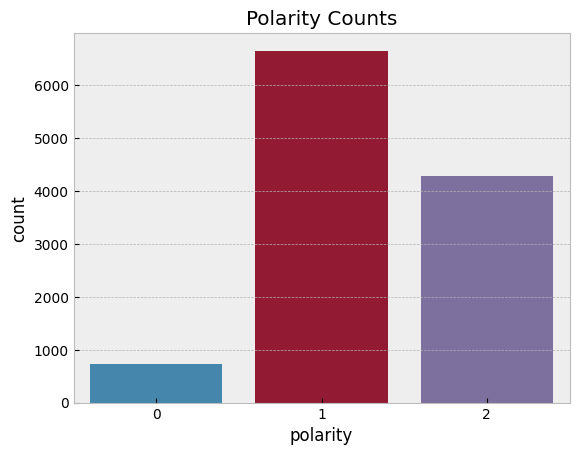

In [ ]:
# Jumlah polaritas visualisasi kumpulan dataset
fig = sns.countplot(x= 'polarity',data = data)
plt.title('Polarity Counts')
plot = fig.get_figure()

In [ ]:
data['polarity'].value_counts()

1    6656
2    4279
0     722
Name: polarity, dtype: int64

In [ ]:
char_len = data['tweet'].str.len()
word_len = data['tweet'].str.split().map(lambda x: len(x))

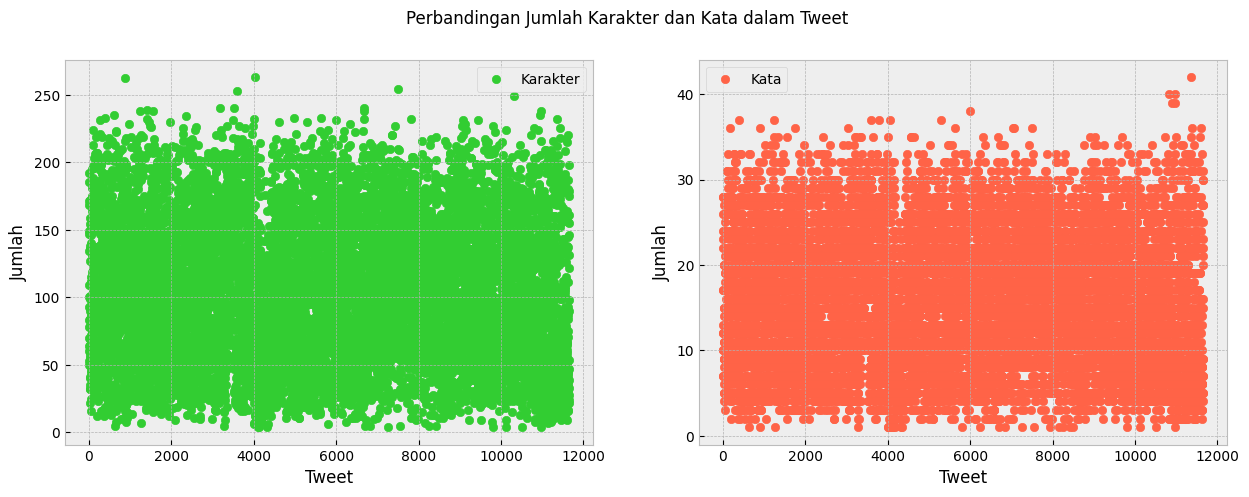

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Perbandingan Jumlah Karakter dan Kata dalam Tweet')

ax1.scatter(char_len.index, char_len.values, color='limegreen', label='Karakter')
ax1.set_xlabel('Tweet')
ax1.set_ylabel('Jumlah')
ax1.legend()

ax2.scatter(word_len.index, word_len.values, color='tomato', label='Kata')
ax2.set_xlabel('Tweet')
ax2.set_ylabel('Jumlah')
ax2.legend()

plt.show()

In [ ]:
# Tokenizer data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(data['tweet']) ## Similar to CountVectorizer.fit_transform()

# Convert our corpus texts into integer sequences
sequences = tokenizer.texts_to_sequences(data['tweet'])
print('Index result of each word: ', sequences[:5])

# Determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocab Size: ', vocab_size)

# The maxlen value is taken from the results of the visualization of the image above
maxlen = 100

# Pad semua teks menjadi panjang yang seragam
X = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post', maxlen=maxlen)
print('Result of pad sequences: ', X[:5])

# Tentukan nilai target dan buat menjadi categorical
# Karena kita melakukan prediksi multiclass
Y = data['polarity'].values
Y = to_categorical(Y)

Index result of each word:  [[335, 89, 1039, 927, 879, 362, 23, 10, 377, 88, 7, 27, 57], [62, 363, 222, 146, 691, 1714, 88, 7, 27, 57, 46, 1463, 164, 309, 309, 9, 1, 2, 5, 1, 10, 370], [2791, 1328, 1715, 2, 17, 9, 1, 2], [73, 4023, 15, 49, 58, 1, 2, 5, 1, 12], [2247, 1536, 2792, 1616, 174, 505, 27, 57, 216, 1617, 4024, 521, 2491, 216, 95, 72, 153, 254, 254, 87, 179, 447, 27, 57]]
Vocab Size:  12613
Result of pad sequences:  [[ 335   89 1039  927  879  362   23   10  377   88    7   27   57    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  62  363  222  146  691 1714   88    7   27   57   4

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9325, 100) (9325, 3)
(2332, 100) (2332, 3)


In [ ]:
# Periksa jumlah setiap label sebelum oversampling
print("Before OverSampling, counts of label '2': {}".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, counts of label '2': [0 0 0]
Before OverSampling, counts of label '1': [ 577 5324 3424]
Before OverSampling, counts of label '0': [8748 4001 5901]


In [ ]:
# melakukan teknik oversampling untuk menangani kelas yang tidak seimbang
over = RandomOverSampler()
X_ov, y_ov = over.fit_resample(X_train, y_train)

# Periksa jumlah setiap label setelah oversampling
print("After OverSampling, counts of label '2': {}".format(sum(y_ov == 2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_ov == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_ov == 0)))

After OverSampling, counts of label '2': [0 0 0]
After OverSampling, counts of label '1': [5324 5324 5324]
After OverSampling, counts of label '0': [10648 10648 10648]


In [ ]:
def create_model(input_length = X_ov.shape[1], embed_dim = 300, filters = 256, dropout_rate = 0.5, optimizers = Adam, learning_rate = 0.0001):
    print('Build model...')
    # Layer Sequential
    model = Sequential()
    # Layer Embedding
    model.add(Embedding(input_dim = vocab_size, output_dim = embed_dim, input_length = input_length))
    # Layer Convolutional 1D
    model.add(Conv1D(filters = filters, kernel_size = 7, activation = 'tanh'))
    # Layer Dropout
    model.add(Dropout(dropout_rate))
    # Layer GlobalMaxPool 1D
    model.add(GlobalMaxPool1D())
    # Layer Dense for output prediction
    model.add(Dense(units = 3, activation = 'softmax'))

    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizers(lr = learning_rate), metrics = ['accuracy'])
    # Summary model
    print(model.summary())
    return model

In [ ]:
# Call model
model = create_model(input_length = X_ov.shape[1],
                     embed_dim = 300,
                     filters = 256,
                     dropout_rate = 0.5,
                     optimizers = Adam,
                     learning_rate = 0.0001)

# Fitting / Training model
hist = model.fit(X_ov,
                 y_ov,
                 batch_size = 16,
                 epochs = 20,
                 validation_split= 0.2,
                 verbose=1)

Build model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          3783900   
                                                                 
 conv1d (Conv1D)             (None, 94, 256)           537856    
                                                                 
 dropout (Dropout)           (None, 94, 256)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
Total params: 4,322,527
Trainable params: 4,322,527
Non-trainable params: 0
_______________________________

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/20
799/799 [==============================] - 201s 250ms/step - loss: 0.9378 - accuracy: 0.5635 - val_loss: 0.9641 - val_accuracy: 0.6360
Epoch 2/20
799/799 [==============================] - 175s 219ms/step - loss: 0.6239 - accuracy: 0.7827 - val_loss: 0.6696 - val_accuracy: 0.8363
Epoch 3/20
799/799 [==============================] - 177s 222ms/step - loss: 0.3690 - accuracy: 0.8875 - val_loss: 0.4923 - val_accuracy: 0.8970
Epoch 4/20
799/799 [==============================] - 181s 226ms/step - loss: 0.2346 - accuracy: 0.9325 - val_loss: 0.3337 - val_accuracy: 0.9502
Epoch 5/20
799/799 [==============================] - 182s 227ms/step - loss: 0.1588 - accuracy: 0.9590 - val_loss: 0.2485 - val_accuracy: 0.9772
Epoch 6/20
799/799 [==============================] - 183s 229ms/step - loss: 0.1116 - accuracy: 0.9730 - val_loss: 0.1838 - val_accuracy: 0.9837
Epoch 7/20
799/799 [==============================] - 182s 227ms/step - loss: 0.0817 - accuracy: 0.9819 - val_loss: 0.1

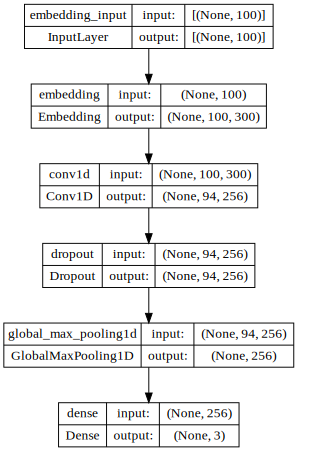

In [ ]:
SVG(model_to_dot(model,show_shapes = True, dpi=75).create(prog='dot', format='svg'))

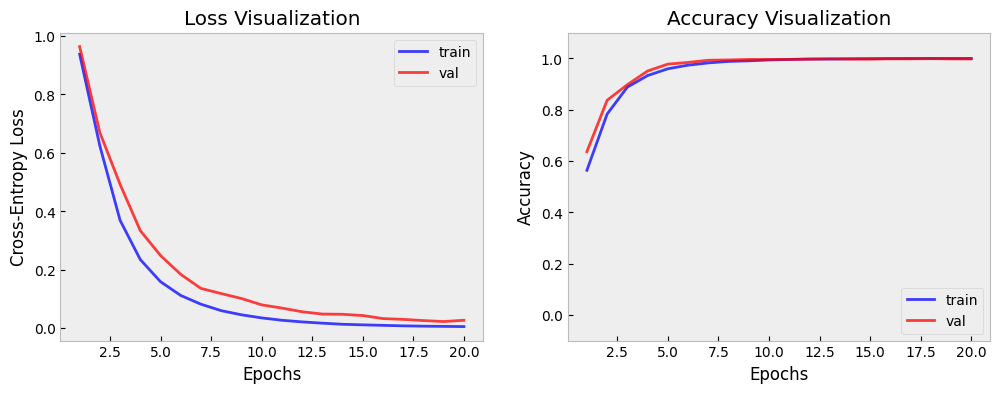

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

epochs = range(1, 21)  # Epochs range from 1 to 20

ax1.plot(epochs, hist.history['loss'], lw=2.0, color='b', alpha=0.75, label='train')
ax1.plot(epochs, hist.history['val_loss'], lw=2.0, color='r', alpha=0.75, label='val')
ax1.set_title('Loss Visualization')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Cross-Entropy Loss')
ax1.legend(loc='upper right')

ax2.plot(epochs, hist.history['accuracy'], lw=2.0, color='b', alpha=0.75, label='train')
ax2.plot(epochs, hist.history['val_accuracy'], lw=2.0, color='r', alpha=0.75, label='val')
ax2.set_title('Accuracy Visualization')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

ax1.grid(False)
ax2.grid(False)

ax2.set_ylim(-0.1, 1.1)
plt.show()


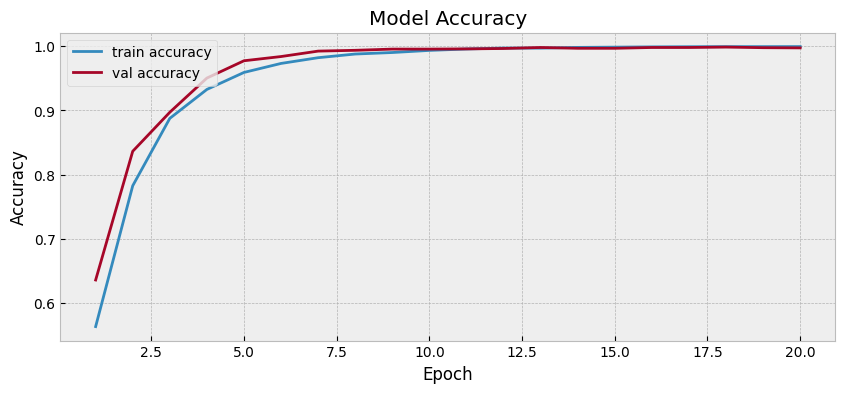

In [ ]:
# Visualization model accuracy (train and val accuracy)
fig, ax = plt.subplots(figsize = (10, 4))
epochs = range(1, 21)  # Epochs range from 1 to 20
ax.plot(epochs, hist.history['accuracy'], label = 'train accuracy')
ax.plot(epochs, hist.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')
plt.show()

Model Accuracy on Test Data: 0.8254716981132075


Classification Report Sentiment:
              precision    recall  f1-score   support

     neutral     0.2642    0.1931    0.2231       145
    positive     0.8648    0.8979    0.8810      1332
    negative     0.8316    0.8199    0.8257       855

    accuracy                         0.8255      2332
   macro avg     0.6535    0.6370    0.6433      2332
weighted avg     0.8153    0.8255    0.8198      2332





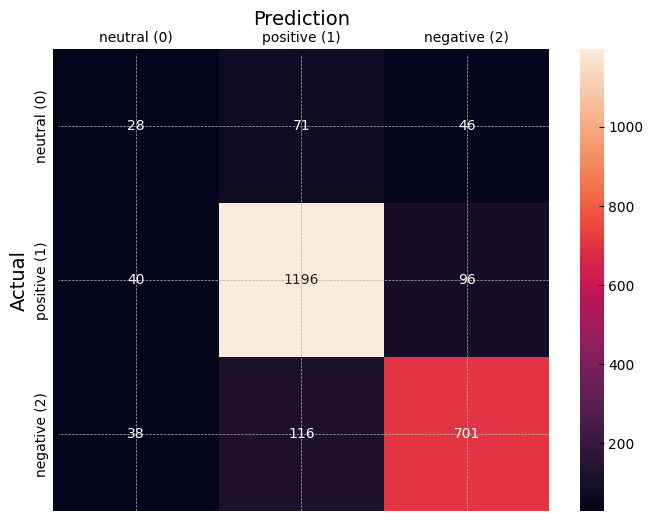

In [ ]:
# Predict sentiment on data test by using model has been created, and then visualize a confusion matrix
y_pred = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred)

print('Model Accuracy on Test Data:', accuracy)
print('\n')
print('Classification Report Sentiment:')
target_names = ['neutral', 'positive', 'negative']
report_sentiments = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report_sentiments)
print('\n')

confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = y_pred), fmt = 'g', annot = True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlabel('Prediction', fontsize = 14)
ax.set_xticklabels(['neutral (0)', 'positive (1)', 'negative (2)'])
ax.set_ylabel('Actual', fontsize = 14)
ax.set_yticklabels(['neutral (0)', 'positive (1)', 'negative (2)'])
plt.show()